<table style="width:100%;font-size:11pt">
        <tr style="width:100%;font-size:11pt">
            <td style="border: 1px #0098cd solid; background-color:#E6F4F9; color:#0098CD; width:35%"><center>Asignatura</center>
            </td>
            <td style="border: 1px #0098cd solid; background-color:#E6F4F9; color:#0098CD"><center>Datos del alumno</center>
            </td>
            <td style="border: 1px #0098cd solid; background-color:#E6F4F9; color:#0098CD; width:10%"><center>Fecha</center>
            </td>
        </tr>
        <tr style="width:100%;font-size:11pt">
            <td rowspan="2" style="border: 1px #0098cd solid"><center><b>Técnicas Multivaraintes y Machine Learning</b></center>
            </td>
            <td style="border: 1px #0098cd solid; text-align:left">Apellidos: Gómez del Hierro</td>
            <td rowspan="2" style="border: 1px #0098cd solid"><center>17/06/2024</center>
            </td>
        </tr>
        <tr>
            <td style="border: 1px #0098cd solid; text-align:left">Nombres: Gonzalo Miguel
            </td>
        </tr>
            <tr style="width:100%;font-size:11pt">
            <td style="border: 1px #0098cd solid; background-color:#E6F4F9; color:#0098CD"><center>Actividad</center>
            </td>
            <td colspan="2" style="border: 1px #0098cd solid; text-align:left">Actividad: Resolver un problema de clasificación
            </td>
        </tr>    
</table>

Librerías y definición de una función para guardar y mostrar los árboles obtenidos con los distintos métodos.

In [ ]:
from plot_utils import plot_grid_search, table_grid_search

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
import os 

def dot_to_png_tree(tree, name):
    # definir donde vamos a guardar la figura
    ROOT_DIR = "."
    PATH_FIGURAS = os.path.join(ROOT_DIR, )
    os.makedirs(PATH_FIGURAS, exist_ok=True)
    export_graphviz(
        tree,
        out_file = os.path.join(PATH_FIGURAS, "{}.dot".format(name)),
        feature_names = columns[0:14],
        class_names = ['0','1'],
        rounded = True,
        filled = True
    )
    Source.from_file("{}.dot".format(name))
    
    # Convert to png using system command (requires Graphviz)
    call(['dot', '-Tpng', '{}.dot'.format(name), '-o', '{}.png'.format(name), '-Gdpi=600'])

In [ ]:
# importamos algunas librerías y funciones para usar durante el desarrollo de la práctica
import sklearn
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import copy as cp
from sklearn.ensemble import RandomForestClassifier

A partir de mi NI (71204274) y según las reglas recogidas en el enunciado de la práctica, definimos la semilla siguiente. La definimos como un string para poder acceder a las posiciones de manera más cómoda. 
También, definimos los parámetros de entrada que necesita la función make_regression de sklearn tal y como se describe en el enunciado de la práctica.

In [ ]:
semilla = '72224274' 

In [ ]:
# definimos las variables de entrada para crear la colección de datos según se indica
n_samples = 200 + 10 * int(semilla[0])
n_features = 10 +  int(semilla[1]) + int(semilla[2])
n_informative = 10 + int(semilla[1])
n_redundant = 2
shift = 10 * int(semilla[3])

In [ ]:
# generamos la colección de datos
X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=n_informative,
                      n_redundant=n_redundant, shift=shift, random_state=int(semilla), shuffle=False)

In [ ]:
X.shape

In [ ]:
# etiquetas para las n_features variables independientes + la variable independiente
columns = ['x{}'.format(i) for i in range(X.shape[1])]
columns.append('y')

In [ ]:
# generamos un dataframe apropiado
df = pd.DataFrame(np.hstack((X,y[:, None])), columns=columns)

In [ ]:
# describimos nuestro conjunto de datos con algunas funciones útiles
df

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.head()

In [ ]:
df.tail()

Veamos la matriz de correlación de las variables independientes y la variable dependendiente, con el objetivo de tener una primera sensación de qué variable son más explicativas y también de si podemos tener variables redundantes.

In [ ]:
# Matriz de correlación
corr = df.corr(method='pearson')
print(corr)

In [ ]:
# Mapa de calor sobre las correlaciones entre variables
sns.heatmap(corr, cmap='coolwarm')

Vamos a representar la variable objetivo en función de cada una de las variables independientes, como se pide en el enunciado, pero no resulta muy informativo. Por ser la variable objetivo categórica los gráficos mostrados no son muy reveladores, en el mejor de los casos nos pueden dar una ligera intuición de la zona en que la característica relacionaría más con una clase o la otra.

In [ ]:
sns.pairplot(df, x_vars=columns[0:-1], y_vars=columns[-1])

Podríamos dividir nuestro conjunto en simplemente las primeras 200 observaciones para el conjunto de entrenamiento y las restantes 70 para el conjunto de validación, pero por introducir herramientas establecidas en la industria, generemos nuestros conjuntos de manera aleatoria sobre la muestra.

In [ ]:
# Dividimos nuestro conjunto en validación y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=70/270, random_state=40)
df_train = pd.DataFrame(np.hstack((X_train,y_train[:, None])), columns=columns)
df_test = pd.DataFrame(np.hstack((X_test,y_test[:, None])), columns=columns)

En la construcción de los métodos que viene a continuación, aunque no se pide en el enunciado, por replicabilidad de los resultados se va a fijar el parámetro random_state con el valor que hemos almacenado en semilla.

In [44]:
from sklearn.tree import DecisionTreeClassifier
# construimos el árbol de decisión
base_tree = DecisionTreeClassifier(random_state=int(semilla))
base_tree.fit(X_train, y_train)

# predicción sobre el dataset de test
y_pred = base_tree.predict(X_test)

# porcentaje de acierto
ac_base_tree = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", ac_base_tree)

Accuracy: 0.7714285714285715


In [45]:
# generamos .dot y posteriormente renderizamos .png
dot_to_png_tree(base_tree, 'base_tree')

# mostramos el árbol
Image(filename = 'base_tree.png')

Ahora, tal como se pide en la práctica, se construye un árbol de decisión pero limitando su profundidad a 3 niveles. Esto conlleva que no en todas las hojas más profundas estamos llegando sobre la muestra de entrenamiento a clasificar de manera perfecta las observaciones (GINI 0). Sobre la muestra de test vemos que estamos perdiendo un 1.4% de precisión al restringir la máxima profundidad a 3 (notemos que son 4 niveles menos que el árbol que generado con los valores por defecto).

In [46]:
# construimos el árbol de decisión
depth_three_tree = DecisionTreeClassifier(max_depth=3, random_state=int(semilla))
depth_three_tree.fit(X_train, y_train)

# predicción sobre el dataset de test
y_pred = depth_three_tree.predict(X_test)

# porcentaje de acierto
ac_depth_three_tree = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", ac_depth_three_tree)

print('Diferencia de precisión entre base_tree y depth_three_tree', ac_depth_three_tree-ac_base_tree)

Accuracy: 0.7571428571428571
Diferencia de precisión entre base_tree y depth_three_tree -0.014285714285714346


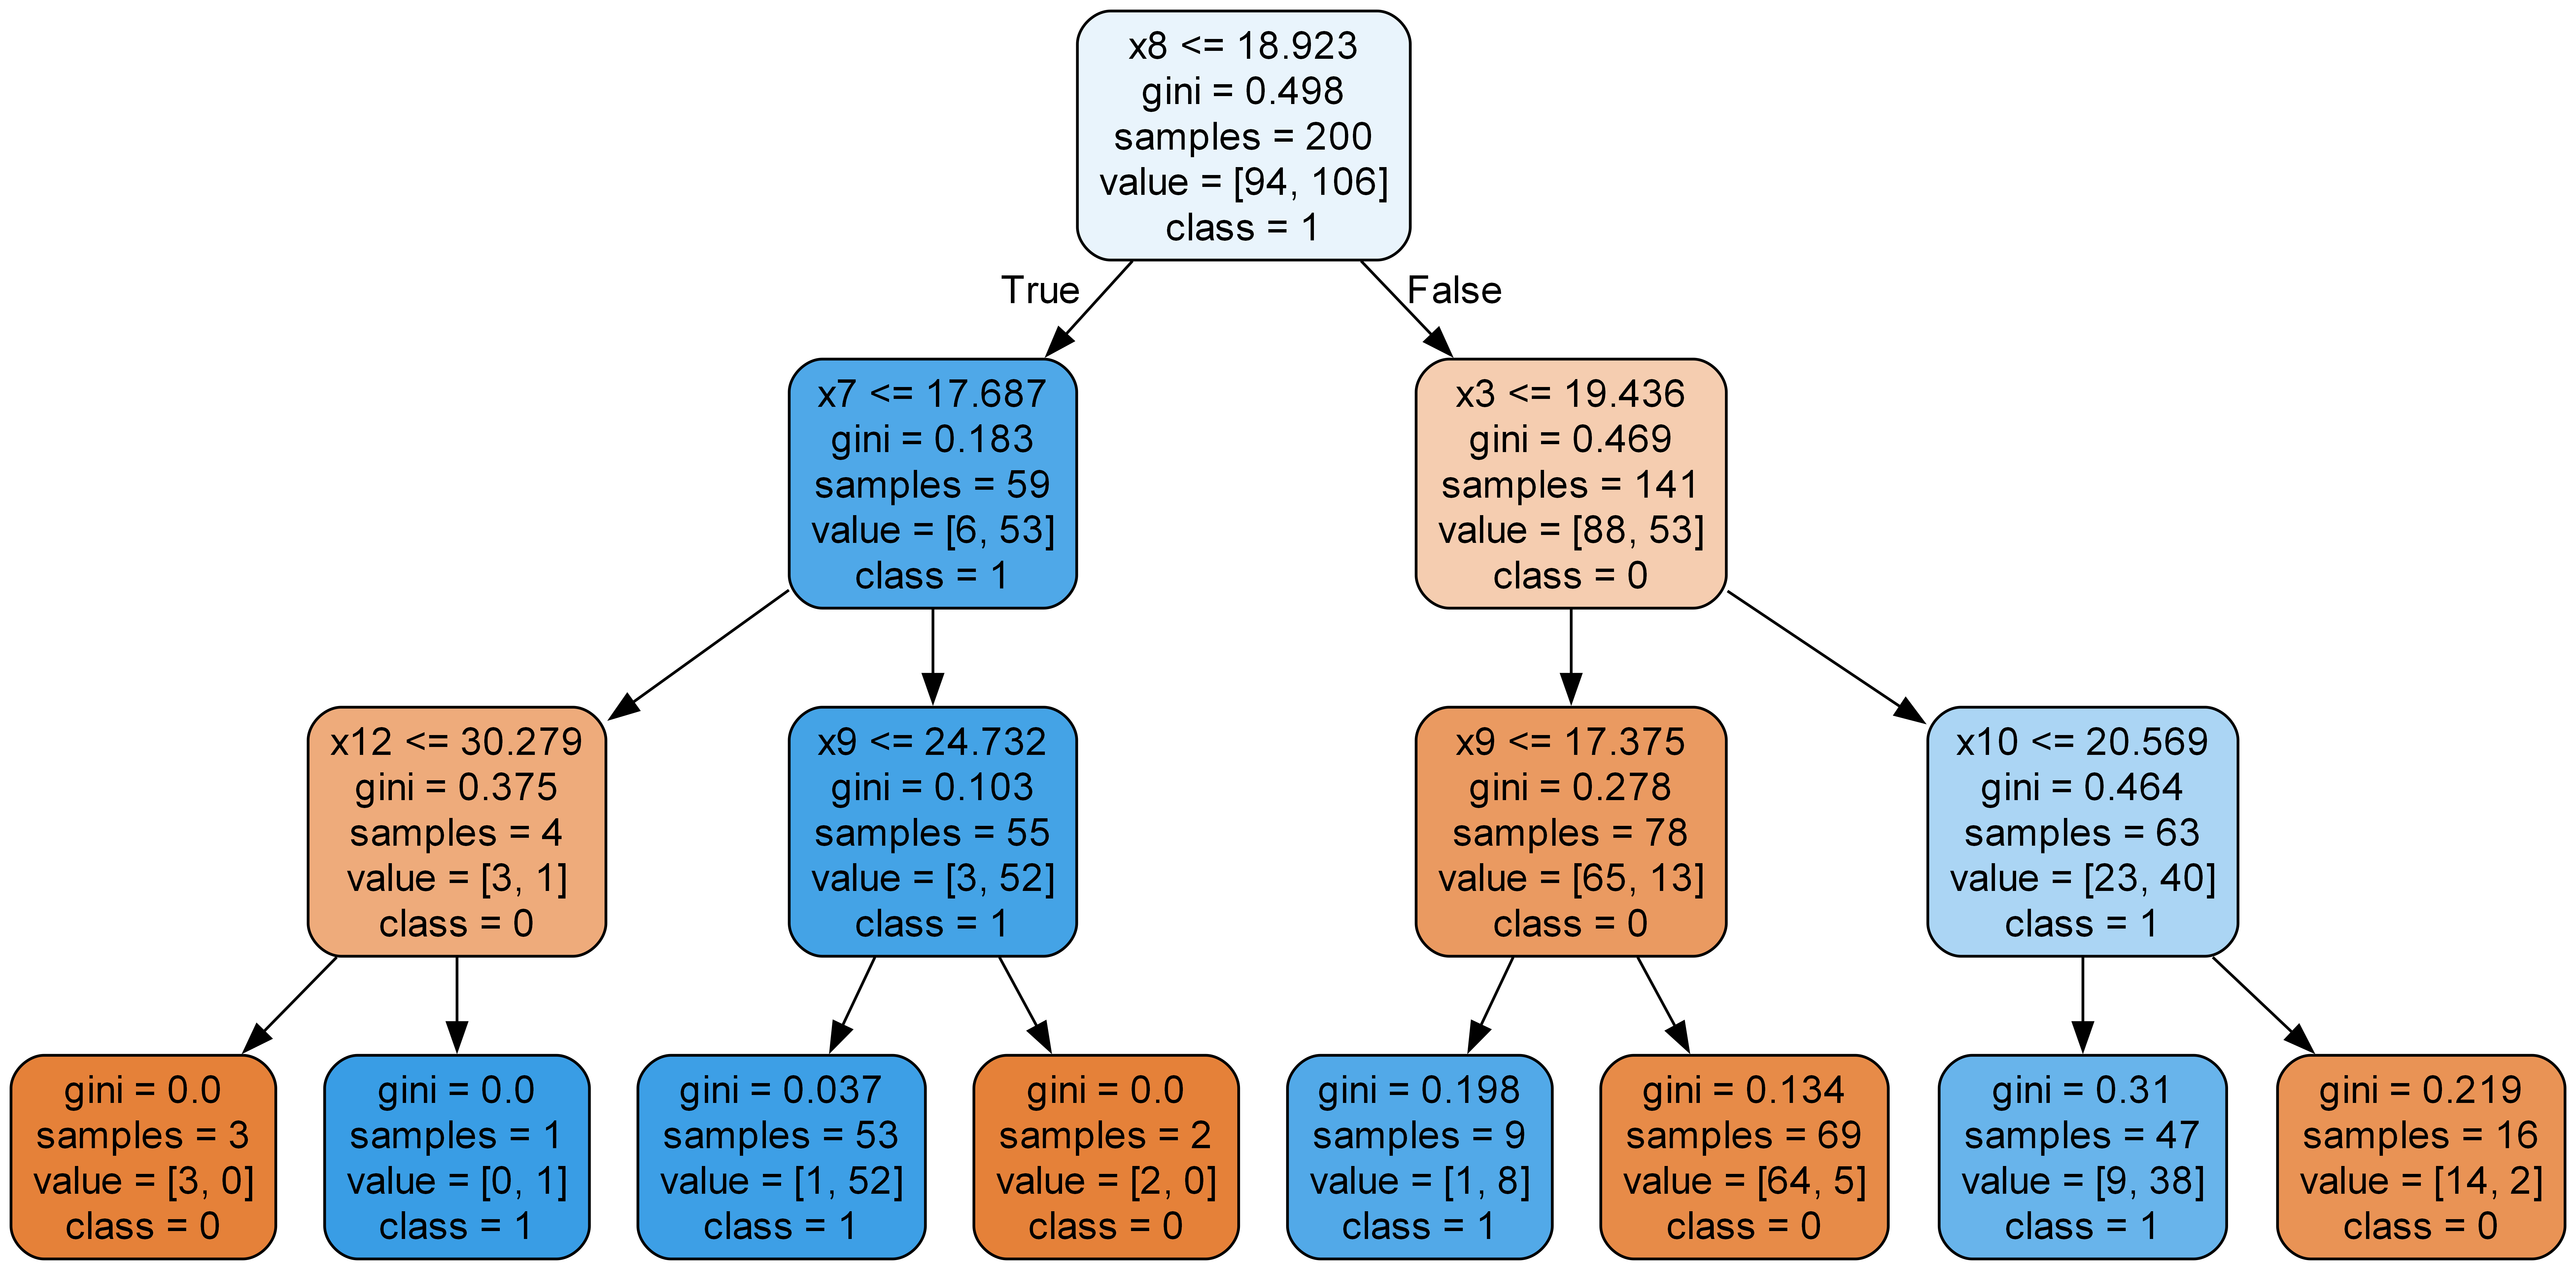

In [47]:
# generamos .dot y posteriormente renderizamos .png
dot_to_png_tree(depth_three_tree, 'depth_three_tree')

# mostramos el árbol
Image(filename = 'depth_three_tree.png')

Ahora limitamos el número mínimo de muestras para dividir un nodo hoja en 2 a 5 observaciones. De este modo obtenemos el árbol que vemos abajo, con 8 niveles de profundidad, que obtiene un mejor rendimiento sobre la muestra de test que el árbol básico en el que no especificábamos ningún parámetro.

In [48]:
# construimos el árbol de decisión
min_samples_tree = DecisionTreeClassifier(min_samples_split=5, random_state=int(semilla))
min_samples_tree.fit(X_train, y_train)

# predicción sobre el dataset de test
y_pred = min_samples_tree.predict(X_test)

# porcentaje de acierto
ac_min_samples_tree = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", ac_min_samples_tree)

print('Diferencia de precisión entre base_tree y min_samples_tree', ac_min_samples_tree-ac_base_tree)

Accuracy: 0.7857142857142857
Diferencia de precisión entre base_tree y min_samples_tree 0.014285714285714235


In [49]:
# generamos .dot y posteriormente renderizamos .png
dot_to_png_tree(min_samples_tree, 'min_samples_tree')

# mostramos el árbol
Image(filename = 'min_samples_tree.png')

De lo obtenido parece que el limitar el número de observaciones en un nodo hoja es una manera más inteligente de restringir las posibles soluciones del árbol que simplemente limitar la profundidad. De todas maneras, para evitar el sobre ajuste, parece que tendría sentido limitar ambos parámetros de una manera inteligente.

# MÉTODOS DE ENSAMBLE

## Bagging y Pasting

Vamos a comenzar con el método de ensamble con reemplazamiento (bagging). Definimos n_jobs=-1 para que se usen todos los procesadores disponibles en paralelo. Buscamos valores óptimos para los parámetros n_estimators y max_samples mediante el empleo del método GridSearchCV.

In [ ]:
# crear objeto de la clase BaggingClassifier
base_bag = BaggingClassifier(
    DecisionTreeClassifier(random_state = int(semilla)),  
    bootstrap=True, # REEMPLAZAMIENTO -> BAGGING
    random_state = int(semilla),
    n_jobs=-1)

# buscamos opciones óptimas tanto para el parámetro n_estimators como para max_samples (basado en una colección elegida por mí)
parameters ={'n_estimators': [10, 50, 100, 200, 500, 1000], 'max_samples':[0.5,0.75, 0.9, 0.95, 1.0]}

bag_clf = GridSearchCV(base_bag, parameters, cv=5, n_jobs=-1)
bag_clf.fit(X_train, y_train)

In [ ]:
plot_grid_search(bag_clf)
table_grid_search(bag_clf)

In [51]:
# predicción sobre la muestra de test
y_pred = bag_clf.predict(X_test)

# precisión de la predicción
ac_bag = metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', ac_bag)

Accuracy: 0.8857142857142857


Hacemos lo mismo, pero con el método sin reemplazamiento esta vez.

In [ ]:
# crear objeto de la clase BaggingClassifier pero sin reemplazamiento
base_pas = BaggingClassifier(
    DecisionTreeClassifier(random_state = int(semilla)),  
    bootstrap=False, # SIN REEMPLAZAMIENTO -> PASTING
    random_state = int(semilla),
    n_jobs=-1)

# buscamos opciones óptimas tanto para el parámetro n_estimators como para max_samples 
# (basado en una colección elegida por mí)
parameters ={'n_estimators': [10, 50, 100, 200, 500, 1000], 'max_samples':[0.5,0.75, 0.9, 0.95,1.0]}

pas_clf = GridSearchCV(base_pas, parameters, cv=5, n_jobs=-1)
pas_clf.fit(X_train, y_train)

In [ ]:
plot_grid_search(pas_clf)
table_grid_search(pas_clf)

In [52]:
# predicción sobre la muestra de test
y_pred = pas_clf.predict(X_test)

# precisión de la predicción
ac_pas = metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', ac_pas)

Accuracy: 0.8714285714285714


## Random Forest

Actuamos de manera análoga a como se ha hecho en el apartado previo, con la particularidad del número de hojas máximo fijado a 4.

In [ ]:
# crear objeto de la clase BaggingClassifier
base_rf = RandomForestClassifier(max_leaf_nodes = 4,
                                 random_state = int(semilla),
                                 n_jobs=-1)
# buscamos opciones óptimas tanto para el parámetro n_estimators como para max_samples (basado en una colección elegida por mí)
parameters ={'n_estimators': [10, 50, 100, 200, 500, 1000], 'max_samples':[0.5,0.75, 0.9, 0.95, 1.0]}

rand_for = GridSearchCV(base_rf, parameters, cv=5, n_jobs=-1)
rand_for.fit(X_train, y_train)

In [ ]:
plot_grid_search(rand_for)
table_grid_search(rand_for)

In [53]:
# predicción sobre la muestra de test
y_pred = rand_for.predict(X_test)

# precisión de la predicción
ac_rf = metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', ac_rf)

Accuracy: 0.8285714285714286


## Gradient Boosting

In [ ]:
# crear objeto de la clase BaggingClassifier
base_gb = GradientBoostingClassifier(random_state = int(semilla))

# buscamos opciones óptimas tanto para el parámetro n_estimators como para max_samples (basado en una colección elegida por mí)
parameters ={'n_estimators': [10, 50, 100, 200, 500, 1000], 'max_depth':[1, 2, 3, 4],
             'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01]}

grad_boost = GridSearchCV(base_gb, parameters, cv=5, n_jobs=-1)
grad_boost.fit(X_train, y_train)

In [ ]:
plot_grid_search(grad_boost)
table_grid_search(grad_boost)

In [54]:
# predicción sobre la muestra de test
y_pred = grad_boost.predict(X_test)

# precisión de la predicción
ac_gb = metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', ac_gb)

Accuracy: 0.9


# Importancia de las características según el método

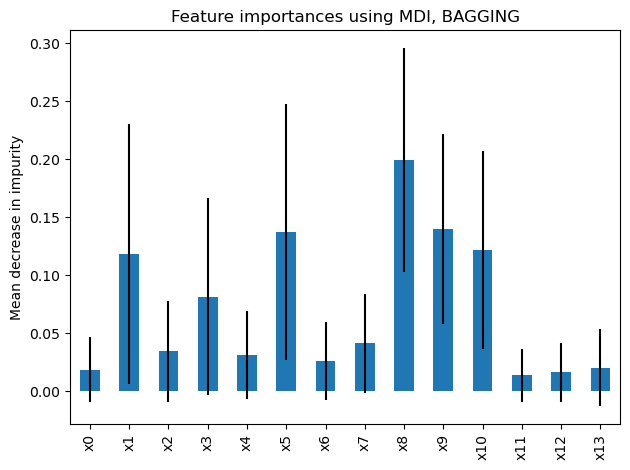

In [55]:
bag_importances = pd.Series(np.mean([tree.feature_importances_ for tree in bag_clf.best_estimator_.estimators_],
                                    axis=0), index=columns[0:14])

std = np.std([tree.feature_importances_ for tree in bag_clf.best_estimator_.estimators_], axis=0)
fig, ax = plt.subplots()
bag_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI, BAGGING")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

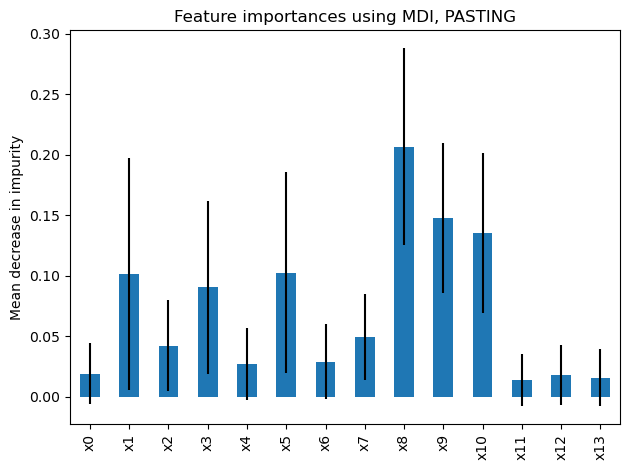

In [56]:
pas_importances = pd.Series(np.mean([tree.feature_importances_ for tree in pas_clf.best_estimator_.estimators_],
                                    axis=0), index=columns[0:14])

std = np.std([tree.feature_importances_ for tree in pas_clf.best_estimator_.estimators_], axis=0)
fig, ax = plt.subplots()
pas_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI, PASTING")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Analicemos la importancia de las variables en el RandomForest óptimo.

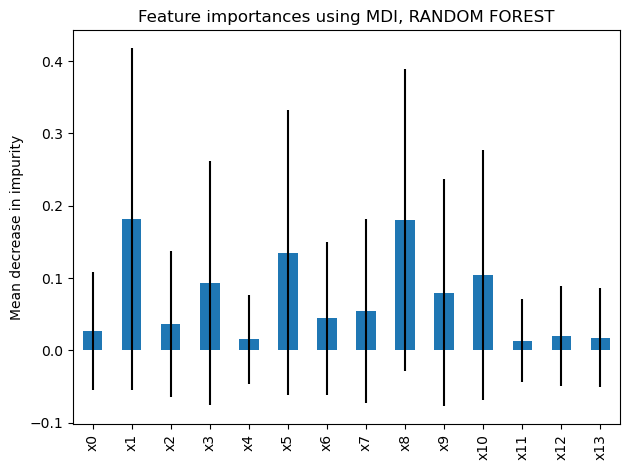

In [57]:
forest_importances = pd.Series(rand_for.best_estimator_.feature_importances_, index=columns[0:14])

std = np.std([tree.feature_importances_ for tree in rand_for.best_estimator_.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI, RANDOM FOREST")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

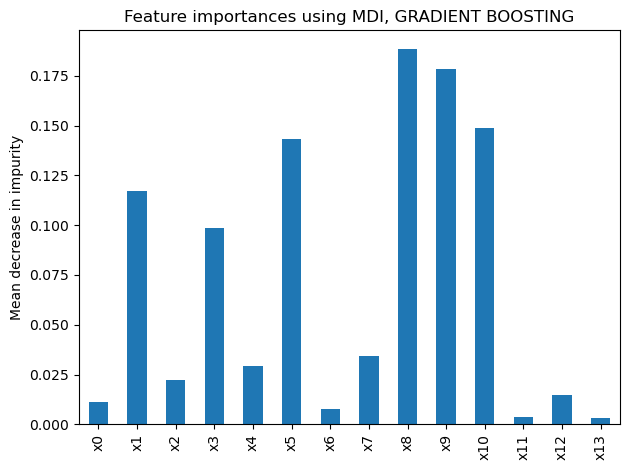

In [58]:
forest_importances = pd.Series(grad_boost.best_estimator_.feature_importances_, index=columns[0:14])
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI, GRADIENT BOOSTING")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Nótese como la desviación típica obtenida en muchos casos es grande en relación a la magnitud de la importancia, lo que nos indica una gran dispersión en los valores de las importancias de los estimadores sencillos que ensambalamos. 

Nótese también que en el último caso(gradient boosting) no hemos podido calcular la desviación típica de los valores de las importancias para los estimadores más sencillos que conforman el ensamble, puesto que la clase DecisionTreeRegressor no tiene este atributo.

De manera común a todos los métodos, las variables más importantes son x1, x3, x5, x8, x9, x10 (no ordenadas), y las menos importantes, la 11 y la 13 (lo que concuerda con las dos variables redundantes que comentábamos al principio.

Por último, representemos de manera conjunta la precisión obtenida sobre la muestra de test con los distintos métodos:

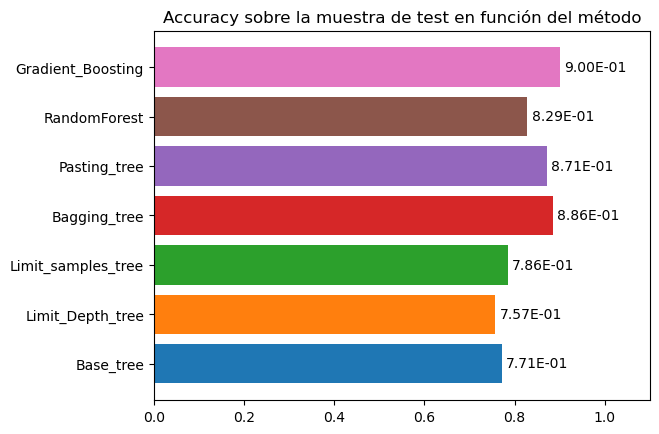

In [59]:
dict_ac = {'Base_tree':ac_base_tree,
           'Limit_Depth_tree':ac_depth_three_tree,
           'Limit_samples_tree':ac_min_samples_tree,
           'Bagging_tree':ac_bag,
           'Pasting_tree':ac_pas,
           'RandomForest':ac_rf,
           'Gradient_Boosting':ac_gb} 
fig, ax = plt.subplots()
x = np.array(range(7))# the label locations
width = 1  # the width of the bars
place = 0
for method, ac in dict_ac.items():
    rects = ax.barh(method, ac, label=method)
    ax.bar_label(rects, padding=3, fmt='%.2E')
    place+=6
ax.set_title('Accuracy sobre la muestra de test en función del método')
ax.set_xlim(0,1.1)
plt.show()

Se observa que los resultados obtenidos para los métodos de ensamble son significativamente mejores, y en particular el gradient boosting es el que mejor rendimiento exhibe.

## Referencias
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
- https://www.kaggle.com/code/juanmah/tactic-03-hyperparameter-optimization-bagging
- https://www.kaggle.com/code/juanmah/grid-search-utils
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#baggingclassifier